<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/07%20-%20Association%20Rules/Walkthrough/walkthrough_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Walkthrough - Association Rules</h1>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# Mining Association Rules
In this week's lab, we are going to mine association rules using the Python library `mlxtend`. You can install the library using pip

In [1]:
%pip install mlxtend

## Hands-On
Before starting to code, let's practice with a toy example.
Calculate support and confidence for the following association rules given the shopping receipts database below.

As a reminder, for the association rule `{S} => {i}`:

* Support =  $\frac{\text{number of transactions containing S and i}}{\text{total number of transactions}}$

* Confidence = $\frac{\text{number of transactions containing S and i}}{\text{number of transactions containing S}}$



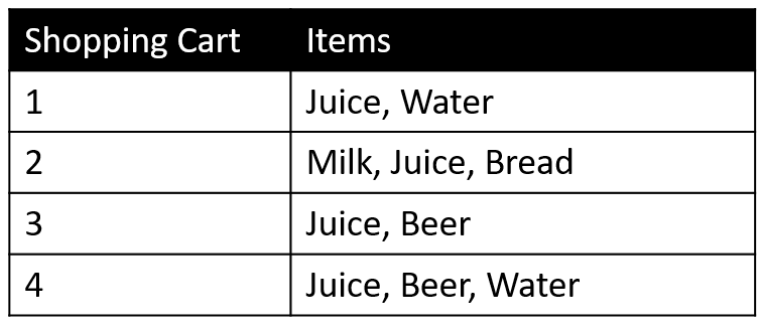



```
{Water} => {Juice}
    Support =
    Confidence =
    
{Juice} => {Water}
    Support =
    Confidence =
    
{Milk} => {Bread}
    Support =
    Confidence =
    
{Juice, Beer} => {Water}
    Support =
    Confidence =
```

Suppose that we have a support threshold of 40% and confidence threshold of 75%.
Which rules are most interesting?

#### Do you think using only the support and confidence measures is enough to identify a rule as interesting?

Actually, you should look at the lift too.

The lift tells us the strength of the association association rule `{S} => {i}` beyond chance:

**Confidence/Support = Lift**

Support = `# transactions containing S and i / total # transactions`





*   Lift = $ \frac{\text{Confidence(S => i) }}{\text{Support(i)}} $ = $\frac{\text{number of transactions containing S and i}}{\text{number of transactions containing S}}$ / $\frac{\text{number of transactions containing i}}{\text{total number of transactions}}$





If the lift = 1: `S` and `i` are independent — the presence of `S` does not affect the likelihood of `i`.

If the lift > 1: `S` and `i` are positively correlated — `i` occurs more often with S than expected by chance.

If the lift < 1: `S` and `i` are negatively correlated — `i` occurs less often with `S` than expected by chance.

## Apriori algorithm

We will use the apriori algorithm to mine the frequent itemsets. The `mlxtend` library has an implementation of this algorithm.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Load data
The dataset we are going to use is a synthetic dataset. It contains the purchases of customers. You can find the source of the dataset [here](https://gist.github.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751)

In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/retail_dataset.csv', sep=',')
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [4]:
df.shape

(315, 7)

Each row of the dataset represents items that were purchased together on the same day at the same store.

The dataset is **sparse**, as a relatively high percentage of cells is null (NA, NaN or equivalent). These null values make it difficult to read the table. Let's find out which unique items can actually be found in the table (based on the first column).

In [5]:
df["0"].unique()

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

## Data Preprocessing
To make use of the apriori module given by `mlxtend` library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

In [6]:
dataset = []
for ind, row in df.iterrows():
    transaction = []
    for item in row:
        # check if item is NaN
        if item == item:
            transaction.append(item)
    dataset.append(transaction)

In [7]:
type(dataset)

list

In [8]:
len(dataset)

315

Next using the `TransactionEncoder` we can transform the transactions to True or False.

In [9]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True


## Applying Apriori
Now we use the apriori module from mlxtend library to find the frequent itemsets. Before that, let's look at some parameters of this module:

- `df` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- `min_support` : Floating point value between 0 and 1 that indicates the minimum support required for an itemset to be selected.
- `use_colnames` : This allows to preserve column names for itemset making it more readable.
- `max_len` : Max length of itemset generated. If not set, all possible lengths are evaluated.



In [10]:
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items.head(10)

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)
7,0.361905,(Pencil)
8,0.438095,(Wine)
9,0.279365,"(Bagel, Bread)"


In [11]:
freq_items.shape

(33, 2)

## Mining association rules

As you know by now, frequent if-then associations are called "association rules". They consist of an antecedent (if) and a consequent (then): `{antecedent} => {consequent}`.

The `metric` parameter can be set to "support", "confidence", "lift", "leverage" and "conviction" (see [this page](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) for more information on how these metrics are defined). In the example below, we use the support metric with a threshold of **0.25** This means that we are keeping only rules with a support at or above 0.25.

In [31]:
rules = association_rules(freq_items, metric="support", min_threshold=0.25)
rules.sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,1.0,0.064641,1.442650,0.402687,0.429268,0.306831,0.605088
1,(Bread),(Bagel),0.504762,0.425397,0.279365,0.553459,1.301042,1.0,0.064641,1.286787,0.467220,0.429268,0.222871,0.605088
2,(Milk),(Bread),0.501587,0.504762,0.279365,0.556962,1.103415,1.0,0.026183,1.117823,0.188043,0.384279,0.105404,0.555211
3,(Bread),(Milk),0.504762,0.501587,0.279365,0.553459,1.103415,1.0,0.026183,1.116164,0.189248,0.384279,0.104074,0.555211
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,1.0,0.078670,1.563203,0.469167,0.465347,0.360288,0.638048


The `rules` dataframe contains all the association rules that we determined as interesting. What do you think? Are they really interesting?

Try to generate the above rules again but now with a smaller threshold for support, say $0.2$. What do you think about the rules now?

In [32]:
rules = association_rules(freq_items, metric="support", min_threshold=0.2)

# Select only the lift > 1, to see 'stronghest' association rules
rules[rules["lift"] > 1].sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,1.0,0.064641,1.442650,0.402687,0.429268,0.306831,0.605088
1,(Bread),(Bagel),0.504762,0.425397,0.279365,0.553459,1.301042,1.0,0.064641,1.286787,0.467220,0.429268,0.222871,0.605088
2,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,1.0,0.012023,1.060116,0.092833,0.321267,0.056707,0.489609
3,(Milk),(Bagel),0.501587,0.425397,0.225397,0.449367,1.056348,1.0,0.012023,1.043532,0.107024,0.321267,0.041716,0.489609
4,(Cheese),(Bread),0.501587,0.504762,0.238095,0.474684,0.940411,1.0,-0.015087,0.942742,-0.112794,0.309917,-0.060735,0.473191


We can also find result for a specific type of antecedent or consequent. For exemple, we can extract and rank association rules that have `Cheese` as the `consequent`, sorted by descending support to highlight the most frequent ones.

In [33]:
# Extract rules with 'Cheese' as consequents
rules[rules["consequents"].astype(str).str.contains("Cheese")].sort_values(by="support", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,1.0,0.064641,1.442650,0.402687,0.429268,0.306831,0.605088
1,(Bread),(Bagel),0.504762,0.425397,0.279365,0.553459,1.301042,1.0,0.064641,1.286787,0.467220,0.429268,0.222871,0.605088
2,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,1.0,0.012023,1.060116,0.092833,0.321267,0.056707,0.489609
3,(Milk),(Bagel),0.501587,0.425397,0.225397,0.449367,1.056348,1.0,0.012023,1.043532,0.107024,0.321267,0.041716,0.489609
4,(Cheese),(Bread),0.501587,0.504762,0.238095,0.474684,0.940411,1.0,-0.015087,0.942742,-0.112794,0.309917,-0.060735,0.473191
